In [6]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [7]:
class K_Means:
    def __init__(self, k=2, tol=0.001, max_iter=300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter

    def fit(self, dataset):
        self.centroids = {}
        for i in range(self.k):
            self.centroids[i] = dataset[i]

        for i in range(self.max_iter):
            self.classifications = {}
            for i in range(self.k):
                self.classifications[i] = []

            for features in dataset:
                dist = []
                for centroid in self.centroids:
                    dist.append(np.linalg.norm(
                        features - self.centroids[centroid]))

                classification = dist.index(min(dist))
                self.classifications[classification].append(features)

            prev_centroids = dict(self.centroids)
            for classification in self.classifications:
                self.centroids[classification] = np.average(
                    self.classifications[classification], axis=0)

            optimized = True
            for c in self.centroids:
                prev_centroid = prev_centroids[c]
                cur_centroid = self.centroids[c]
                if np.sum((cur_centroid - prev_centroid) / prev_centroid * 100) > self.tol:
                    optimized = False

            if optimized:
                break

    def predict(self, features):
        dist = []
        for centroid in self.centroids:
            dist.append(np.linalg.norm(features - self.centroids[centroid]))

        classification = dist.index(min(dist))
        return classification

In [8]:
data_set = np.array([[1, 2], [1.5, 1.8], [5, 8], [8, 8], [1, 0.6], [9, 11]])
test_set = np.array([[4, 5], [10, 14], [12, 14], [1, 0]])
colors = ["g", "r", "c", "b", "k"]

In [9]:
model = K_Means()
model.fit(data_set)

Featureset: [4 5] | Prediction: g
Featureset: [10 14] | Prediction: r
Featureset: [12 14] | Prediction: r
Featureset: [1 0] | Prediction: g


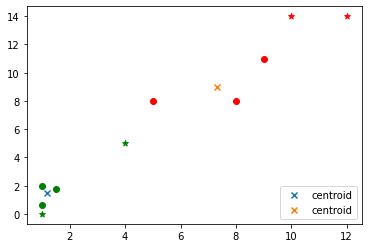

In [10]:
for centroid in model.centroids:
    plt.scatter(model.centroids[centroid][0],
                model.centroids[centroid][1], marker="x", label="centroid")


for classification in model.classifications:
    for features in model.classifications[classification]:
        plt.scatter(features[0], features[1], color=colors[classification])

for t in test_set:
    prediction = model.predict(t)
    plt.scatter(t[0], t[1], marker="*", color=colors[prediction])
    print(f"Featureset: {t} | Prediction: {colors[prediction]}")

plt.legend(loc=4)
plt.show()